In [1]:
#importing all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import xgboost as xgb
import shap
from sklearn.metrics import roc_curve, roc_auc_score




In [2]:
#reading the csv file
data=pd.read_csv('Airline.csv')
data.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2023,12,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",72.0,5.0,2.46,1.00,...,0.0,0.81,0.0,0.0,672.0,61.0,574.0,20.0,0.0,17.0
1,2023,12,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",62.0,7.0,4.25,0.00,...,0.0,1.75,0.0,0.0,348.0,252.0,0.0,33.0,0.0,63.0
2,2023,12,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",95.0,10.0,5.94,0.00,...,0.0,3.00,0.0,0.0,859.0,536.0,0.0,47.0,0.0,276.0
3,2023,12,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",23.0,2.0,0.56,0.00,...,0.0,1.44,1.0,0.0,75.0,9.0,0.0,0.0,0.0,66.0
4,2023,12,9E,Endeavor Air Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",2111.0,256.0,76.88,8.75,...,0.0,117.94,1.0,0.0,21424.0,8906.0,732.0,1487.0,0.0,10299.0


In [3]:
#counting all the null values
data.isnull().sum()

year                     0
month                    0
carrier                  0
carrier_name             0
airport                  0
airport_name             0
arr_flights            341
arr_del15              591
carrier_ct             341
weather_ct             341
nas_ct                 341
security_ct            341
late_aircraft_ct       341
arr_cancelled          341
arr_diverted           341
arr_delay              341
carrier_delay          341
weather_delay          341
nas_delay              341
security_delay         341
late_aircraft_delay    341
dtype: int64

In [4]:
#counting the no. of unique values just for extra info
data.nunique()

year                       9
month                     12
carrier                   29
carrier_name              39
airport                  396
airport_name             420
arr_flights             5460
arr_del15               1692
carrier_ct             14204
weather_ct              3921
nas_ct                 14165
security_ct              868
late_aircraft_ct       15566
arr_cancelled            567
arr_diverted             112
arr_delay              20865
carrier_delay          11969
weather_delay           4333
nas_delay               9747
security_delay           577
late_aircraft_delay    13221
dtype: int64

In [5]:
# to know number of rows and columns
data.shape

(179338, 21)

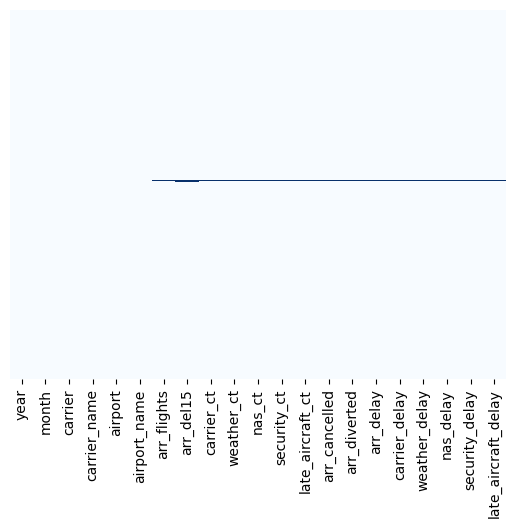

In [6]:
sns.heatmap(data.isnull(), cmap='Blues', cbar=False, yticklabels=False, xticklabels=data.columns)
plt.show()


In [7]:
## Here i can observe that null values are in same rows in every column majorly so i can remove directly those rows
data = data[data['carrier_ct'].notnull()]

In [8]:
data.isnull().sum()
#Now i only have 250 missing values in arr_del15 column only

year                     0
month                    0
carrier                  0
carrier_name             0
airport                  0
airport_name             0
arr_flights              0
arr_del15              250
carrier_ct               0
weather_ct               0
nas_ct                   0
security_ct              0
late_aircraft_ct         0
arr_cancelled            0
arr_diverted             0
arr_delay                0
carrier_delay            0
weather_delay            0
nas_delay                0
security_delay           0
late_aircraft_delay      0
dtype: int64

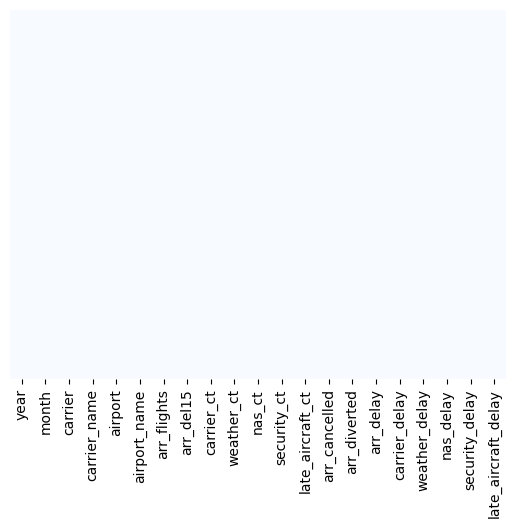

In [9]:
sns.heatmap(data.isnull(), cmap='Blues', cbar=False, yticklabels=False, xticklabels=data.columns)
plt.show()

In [10]:
data = data[data['arr_del15'].notnull()]
#As there is large number of records (large dataset)

In [11]:
data.isnull().sum()
#no missing values now:

year                   0
month                  0
carrier                0
carrier_name           0
airport                0
airport_name           0
arr_flights            0
arr_del15              0
carrier_ct             0
weather_ct             0
nas_ct                 0
security_ct            0
late_aircraft_ct       0
arr_cancelled          0
arr_diverted           0
arr_delay              0
carrier_delay          0
weather_delay          0
nas_delay              0
security_delay         0
late_aircraft_delay    0
dtype: int64

In [12]:
data.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2023,12,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",72.0,5.0,2.46,1.00,...,0.0,0.81,0.0,0.0,672.0,61.0,574.0,20.0,0.0,17.0
1,2023,12,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",62.0,7.0,4.25,0.00,...,0.0,1.75,0.0,0.0,348.0,252.0,0.0,33.0,0.0,63.0
2,2023,12,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",95.0,10.0,5.94,0.00,...,0.0,3.00,0.0,0.0,859.0,536.0,0.0,47.0,0.0,276.0
3,2023,12,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",23.0,2.0,0.56,0.00,...,0.0,1.44,1.0,0.0,75.0,9.0,0.0,0.0,0.0,66.0
4,2023,12,9E,Endeavor Air Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",2111.0,256.0,76.88,8.75,...,0.0,117.94,1.0,0.0,21424.0,8906.0,732.0,1487.0,0.0,10299.0


In [13]:
r_columns = [
    'arr_delay', 'carrier_delay', 'weather_delay',
    'nas_delay', 'security_delay', 'late_aircraft_delay','arr_flights'
]


def remove_outliers_iqr(data, columns):
    for col in columns:
        if col in data.columns:
            Q1 = data[col].quantile(0.25)
            Q3 = data[col].quantile(0.75)
            IQR = Q3 - Q1
            lower = Q1 - 1.5 * IQR
            upper = Q3 + 1.5 * IQR
            before = data.shape[0]
            data = data[(data[col] >= lower) & (data[col] <= upper)]
            after = data.shape[0]
            print(f"{col}: Removed {before - after} outliers.")
    return data

# === APPLY OUTLIER REMOVAL ===
data_cleaned = remove_outliers_iqr(data.copy(), r_columns)  # Use .copy() to preserve original

print(f"\nOriginal shape: {data.shape}")
print(f"Cleaned shape: {data_cleaned.shape}")




arr_delay: Removed 22198 outliers.
carrier_delay: Removed 10496 outliers.
weather_delay: Removed 18778 outliers.
nas_delay: Removed 9920 outliers.
security_delay: Removed 4756 outliers.
late_aircraft_delay: Removed 7810 outliers.
arr_flights: Removed 6347 outliers.

Original shape: (178747, 21)
Cleaned shape: (98442, 21)


In [14]:

data_cleaned.to_csv("Airline_Delay_Cause_Cleaned.csv",index=False)
#data after removal of outliers

C:\Users\Mahi Garg\AppData\Local\Temp\ipykernel_24948\3977692202.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=airline_stats.index, y=airline_stats['% Delayed'], palette='viridis')


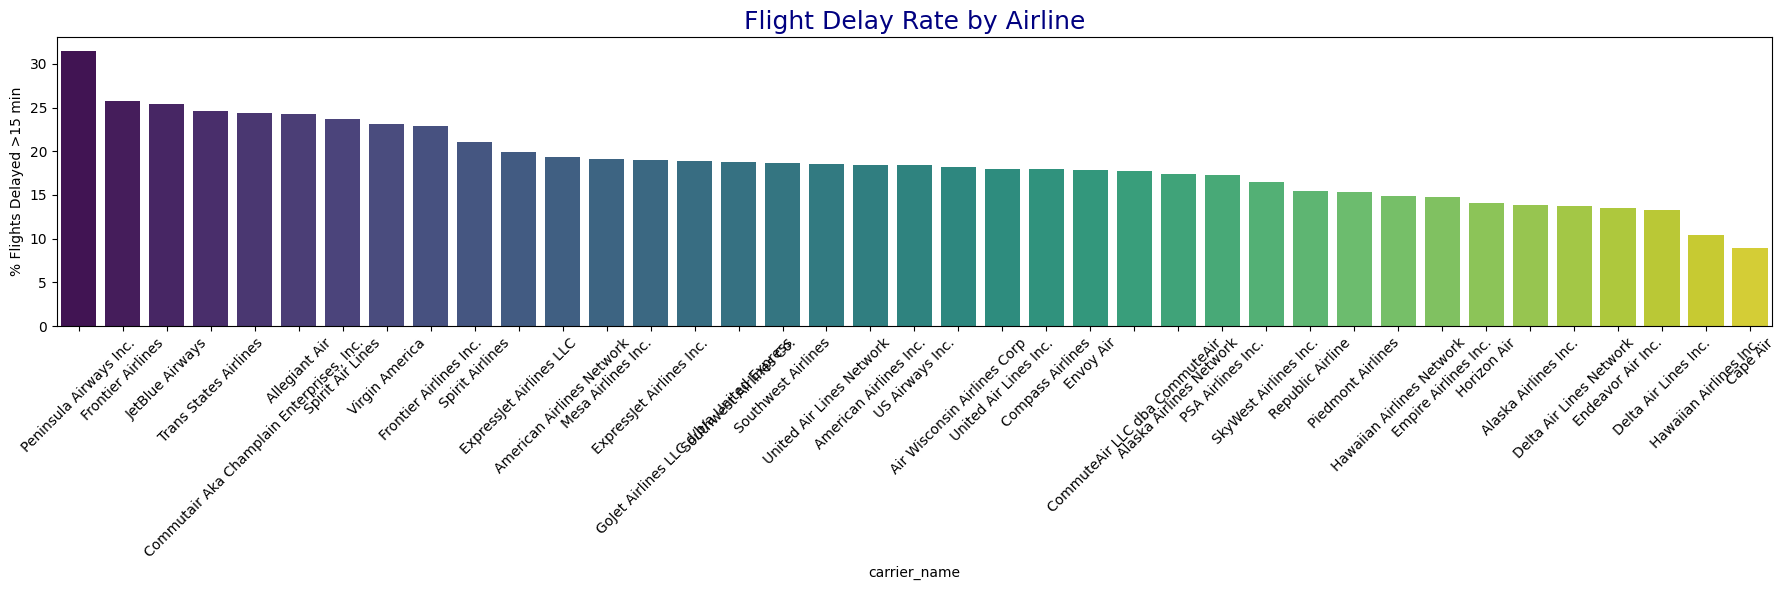

In [15]:

airline_stats = data.groupby('carrier_name')[['arr_flights', 'arr_del15']].sum()
airline_stats['% Delayed'] = 100 * airline_stats['arr_del15'] / airline_stats['arr_flights']
airline_stats = airline_stats.sort_values('% Delayed', ascending=False)

# Plotting
plt.figure(figsize=(18,6))
sns.barplot(x=airline_stats.index, y=airline_stats['% Delayed'], palette='viridis')
plt.xticks(rotation=45)
plt.ylabel('% Flights Delayed >15 min')
plt.title('Flight Delay Rate by Airline', fontsize=18, color='navy')
plt.tight_layout()
plt.show()
    

In [16]:
# percentage of flight delays is maximum in Peninsula Airways Inc. and minimum in Cape Air.

<Figure size 1200x600 with 0 Axes>

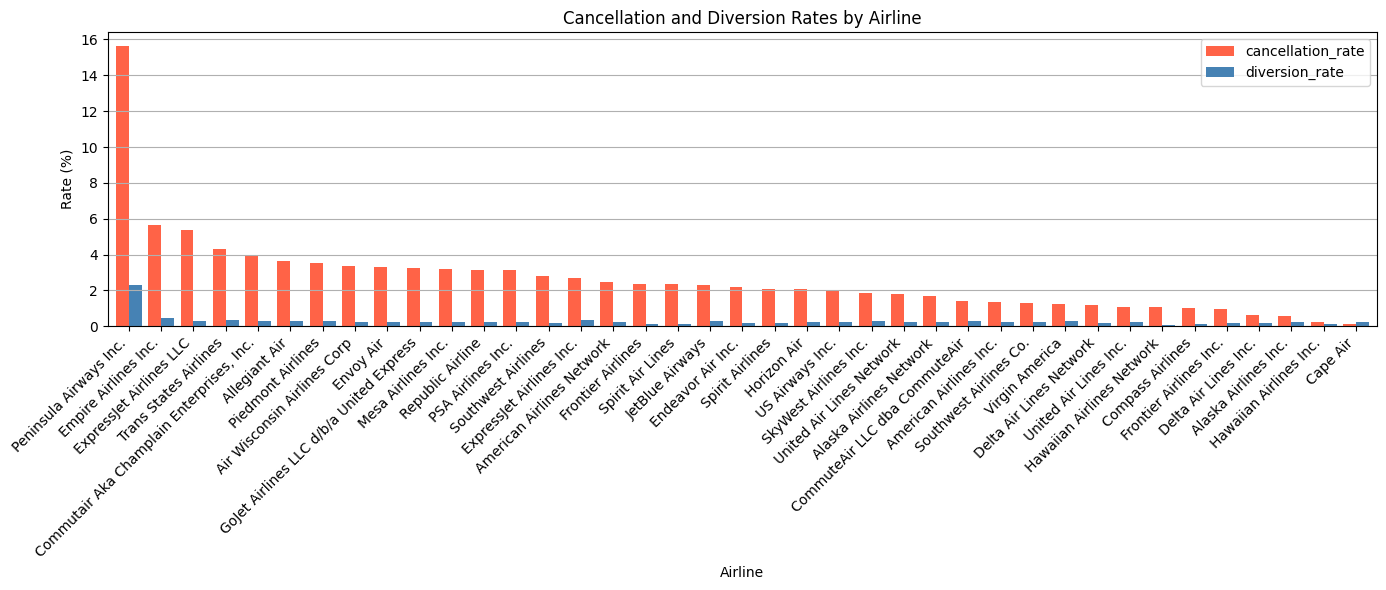

In [17]:
airline_stats = data.groupby('carrier_name').agg({
    'arr_flights': 'sum',
    'arr_cancelled': 'sum',
    'arr_diverted': 'sum'
})

# Calculate rates as percentages
airline_stats['cancellation_rate'] = (airline_stats['arr_cancelled'] / airline_stats['arr_flights']) * 100
airline_stats['diversion_rate'] = (airline_stats['arr_diverted'] / airline_stats['arr_flights']) * 100

# Sort for better visuals
airline_stats_sorted = airline_stats.sort_values(by='cancellation_rate', ascending=False)

# Plot
plt.figure(figsize=(12, 6))
airline_stats_sorted[['cancellation_rate', 'diversion_rate']].plot(
    kind='bar',
    figsize=(14, 6),
    width=0.8,
    color=['tomato', 'steelblue']
)

plt.title('Cancellation and Diversion Rates by Airline')
plt.ylabel('Rate (%)')
plt.xlabel('Airline')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y')
plt.legend(loc='upper right')
plt.show()
#(red = cancel, blue = diverted)

In [18]:
# Peninsula Airways Inc. have maximum cancellation and diversion rate
# So i guess Peninsula Airways Inc.does not give a good airline servives, so we need to find reasons behind its bad performance.


<Axes: title={'center': 'Average Delay Causes (minutes)'}, ylabel='Minutes'>

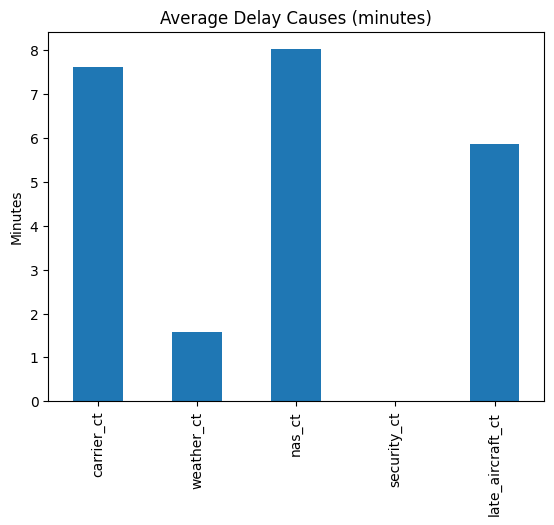

In [19]:
# Filter for Peninsula Airways
peninsula_data = data[data['carrier_name'].str.contains('Peninsula', case=False, na=False)]
delay_causes = ['carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct']

# Mean delay by cause
peninsula_data[delay_causes].mean().plot(kind='bar', title='Average Delay Causes (minutes)', ylabel='Minutes')


In [20]:
#from the above graph, maximum delay duration is of penninsula airlines is due to nas_ct

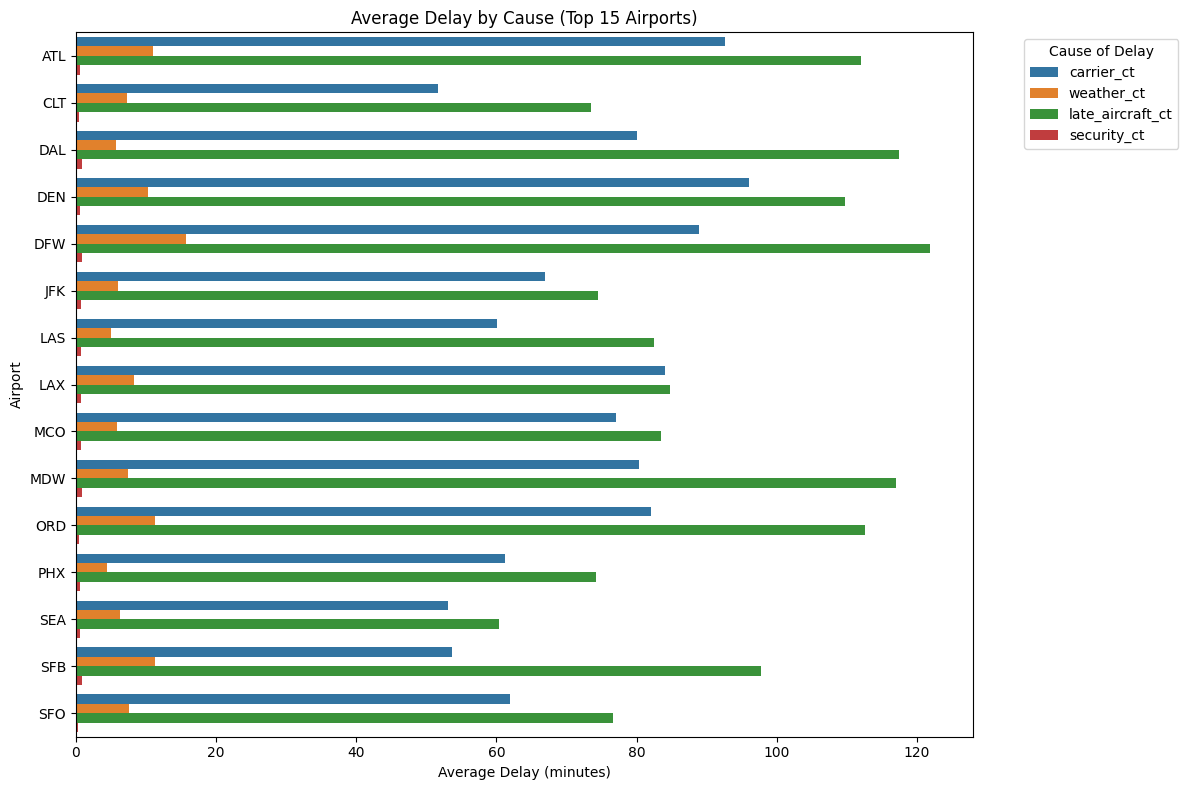

In [21]:
delay_columns = ['carrier_ct', 'weather_ct', 'late_aircraft_ct', 'security_ct']

# Calculate total average delay per airport (sum of all causes)
data['total_avg_delay'] = data[delay_columns].sum(axis=1)
top_airports = data.groupby('airport')['total_avg_delay'].mean().nlargest(15).index

# Filter top airports
data_top = data[data['airport'].isin(top_airports)]

# Group and reshape
avg_delays = data_top.groupby('airport')[delay_columns].mean().reset_index()
avg_delays_melted = avg_delays.melt(id_vars='airport', var_name='Delay Cause', value_name='Average Delay (min)')

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(data=avg_delays_melted, y='airport', x='Average Delay (min)', hue='Delay Cause')
plt.title('Average Delay by Cause (Top 15 Airports)')
plt.xlabel('Average Delay (minutes)')
plt.ylabel('Airport')
plt.legend(title='Cause of Delay', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [22]:
#from above graph, i can know that which airport is facing the delay due to whhich main reason

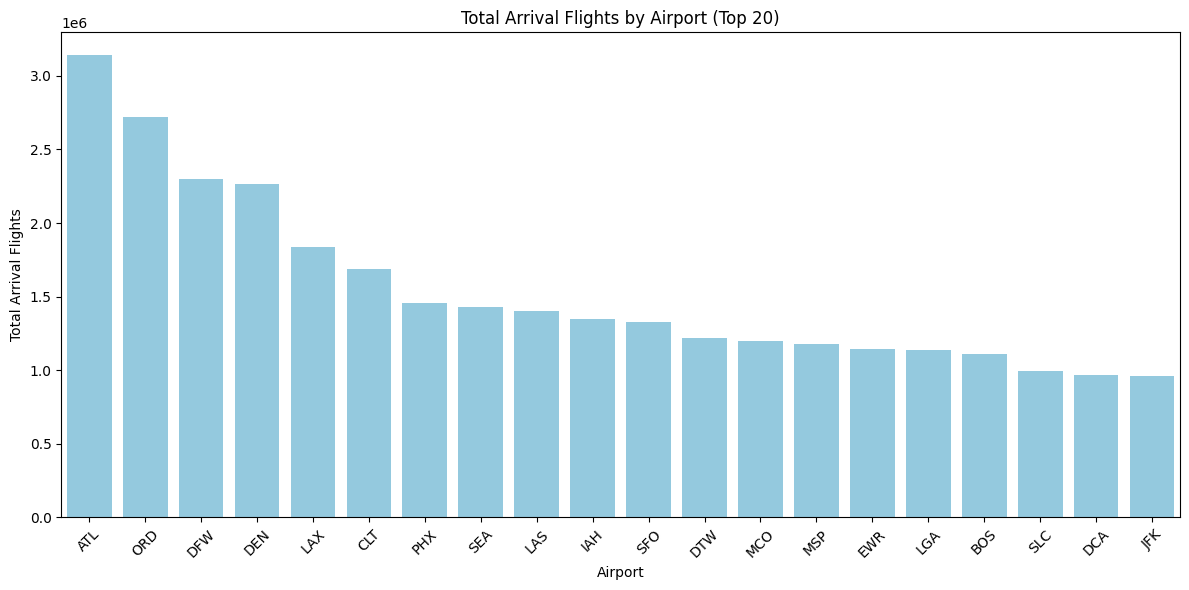

In [23]:
flights_per_airport = data.groupby('airport')['arr_flights'].sum().sort_values(ascending=False).reset_index()

top_n = 20
flights_top = flights_per_airport.head(top_n)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=flights_top, x='airport', y='arr_flights', color='skyblue')
plt.title(f'Total Arrival Flights by Airport (Top {top_n})')
plt.xlabel('Airport')
plt.ylabel('Total Arrival Flights')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [24]:
# Maximum flights are arried on ATL airport, so if i will work on the delay causes for ATL airport, i can reduce a good ratio of delayed flights

In [25]:
data['delay_rate'] = data['arr_del15'] / data['arr_flights']


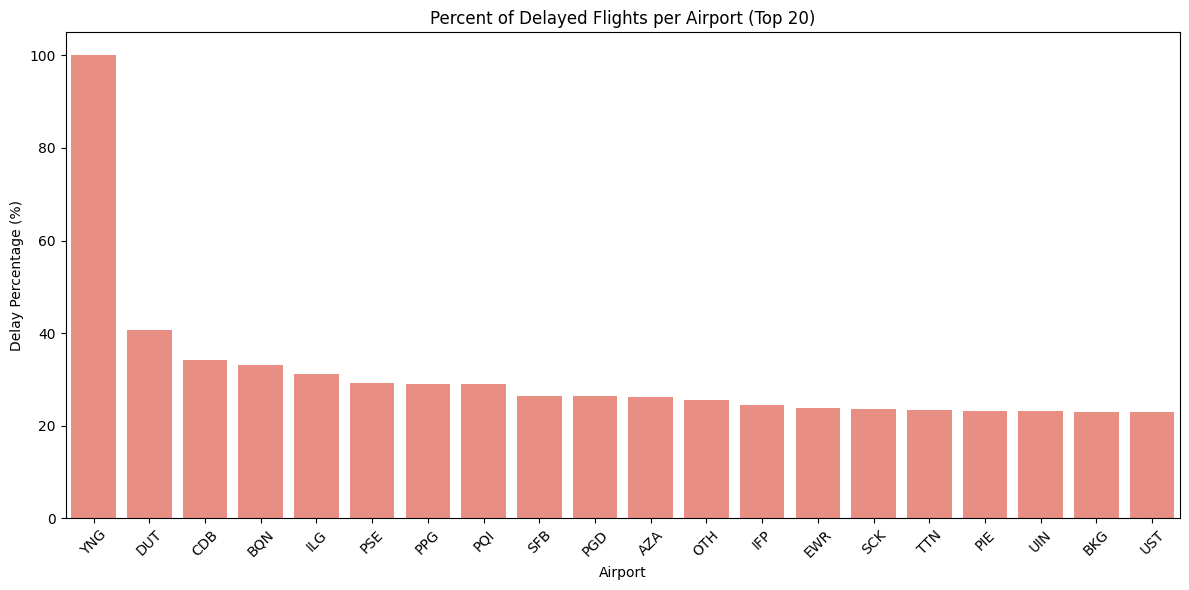

In [26]:
data['delay_percent'] = (data['arr_del15'] / data['arr_flights']) * 100

# Group by airport and get the average delay percentage
delay_percent_per_airport = data.groupby('airport')['delay_percent'].mean().sort_values(ascending=False).reset_index()

top_n = 20
delay_top = delay_percent_per_airport.head(top_n)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=delay_top, x='airport', y='delay_percent', color='salmon')
plt.title(f'Percent of Delayed Flights per Airport (Top {top_n})')
plt.xlabel('Airport')
plt.ylabel('Delay Percentage (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [27]:
# Delay percentage is maximum on YNG airport, so i should work on its delay cause factors also

C:\Users\Mahi Garg\AppData\Local\Temp\ipykernel_24948\3881418674.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=total_delays_by_cause, x='Delay Cause', y='Total Delay (min)', palette='Set2')


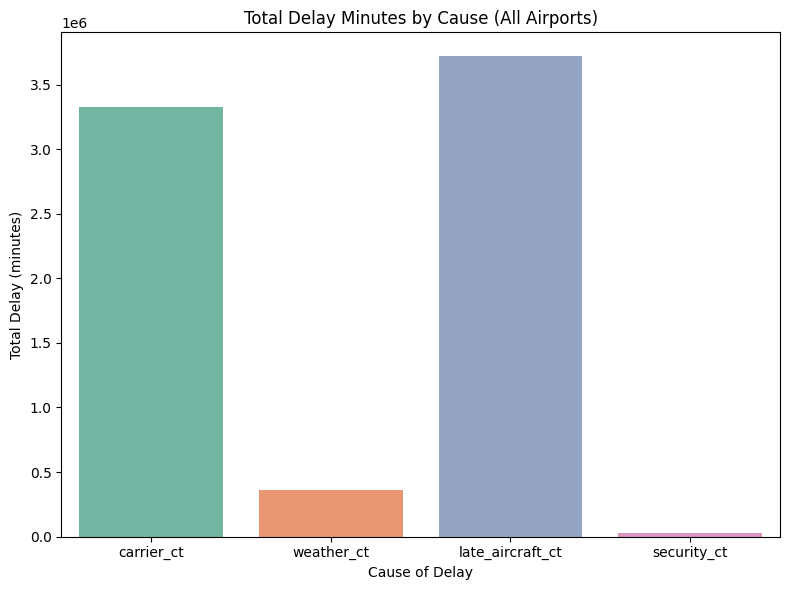

In [28]:
delay_columns = ['carrier_ct', 'weather_ct', 'late_aircraft_ct', 'security_ct']

# Sum total delay minutes by cause across all data
total_delays_by_cause = data[delay_columns].sum().reset_index()
total_delays_by_cause.columns = ['Delay Cause', 'Total Delay (min)']

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(data=total_delays_by_cause, x='Delay Cause', y='Total Delay (min)', palette='Set2')
plt.title('Total Delay Minutes by Cause (All Airports)')
plt.xlabel('Cause of Delay')
plt.ylabel('Total Delay (minutes)')
plt.tight_layout()
plt.show()

In [29]:
data['top_cause'] = data[['carrier_ct', 'weather_ct', 'late_aircraft_ct', 'security_ct']].idxmax(axis=1)
data['top_cause'].value_counts()

top_cause
carrier_ct          104323
late_aircraft_ct     71483
weather_ct            2862
security_ct             79
Name: count, dtype: int64

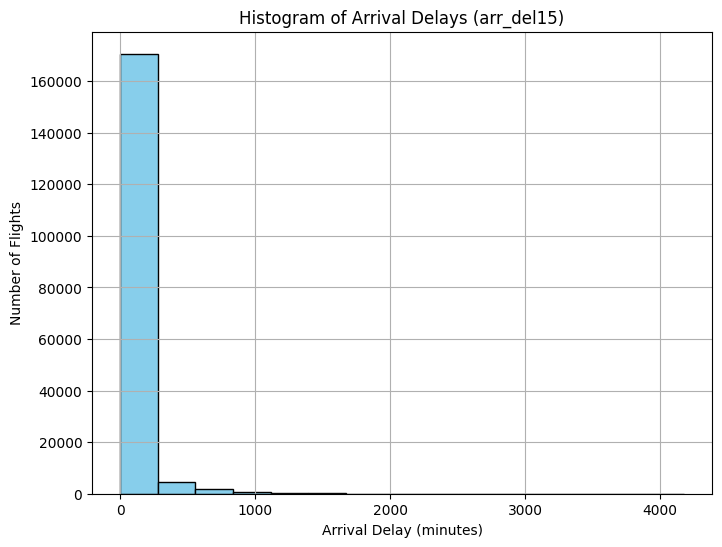

In [30]:
plt.figure(figsize=(8, 6))
plt.hist(data['arr_del15'].dropna(), bins=15, color='skyblue', edgecolor='black')
plt.title('Histogram of Arrival Delays (arr_del15)')
plt.xlabel('Arrival Delay (minutes)')
plt.ylabel('Number of Flights')
plt.grid(True)
plt.show()
#make its boxplot

In [31]:
#it shows delay duration is not less for  maximum number of flights, higher delay duration is very less


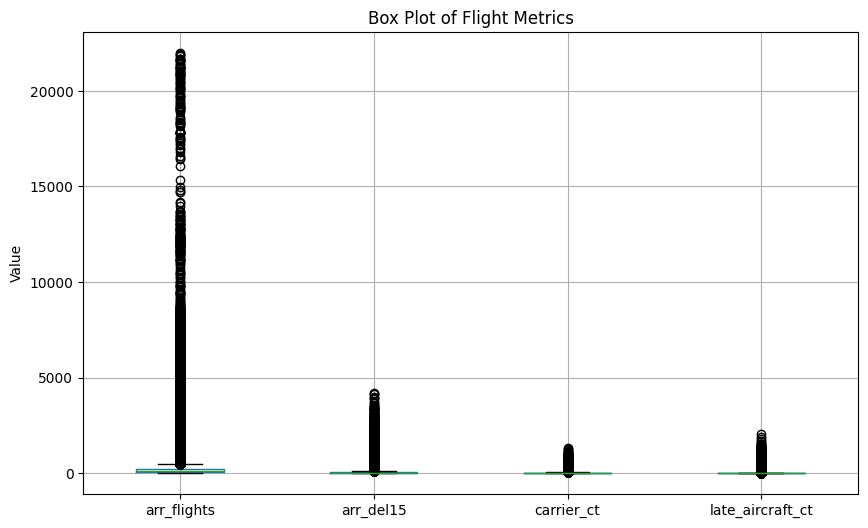

In [32]:
plt.figure(figsize=(10, 6))
data[['arr_flights', 'arr_del15', 'carrier_ct', 'late_aircraft_ct']].boxplot()
plt.title('Box Plot of Flight Metrics')
plt.ylabel('Value')
plt.grid(True)
plt.show()

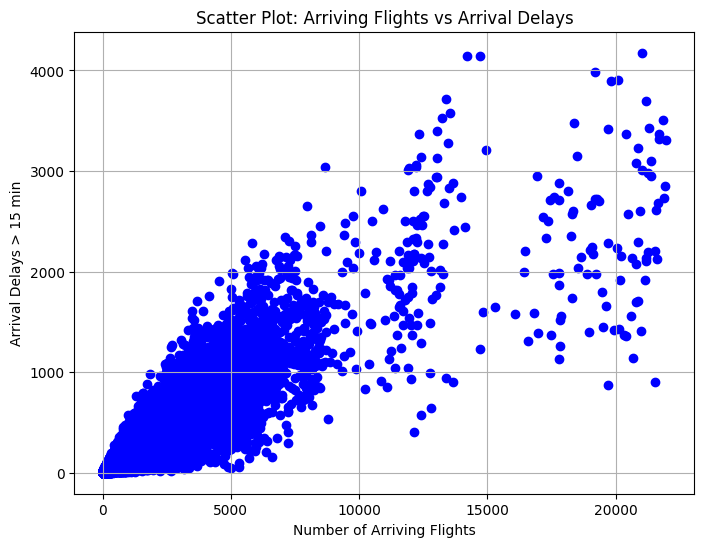

In [33]:
# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(data['arr_flights'], data['arr_del15'], color='blue')
plt.title('Scatter Plot: Arriving Flights vs Arrival Delays')
plt.xlabel('Number of Arriving Flights')
plt.ylabel('Arrival Delays > 15 min')
plt.grid(True)
plt.show()

In [34]:
# this plot shows that as no. of arriving flights are increasing, arrival delays are also increasing, that might be due to very hectic schedule on particular airport.

C:\Users\Mahi Garg\AppData\Local\Temp\ipykernel_24948\2303132997.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x['arr_del15'].sum() / x['arr_flights'].sum())


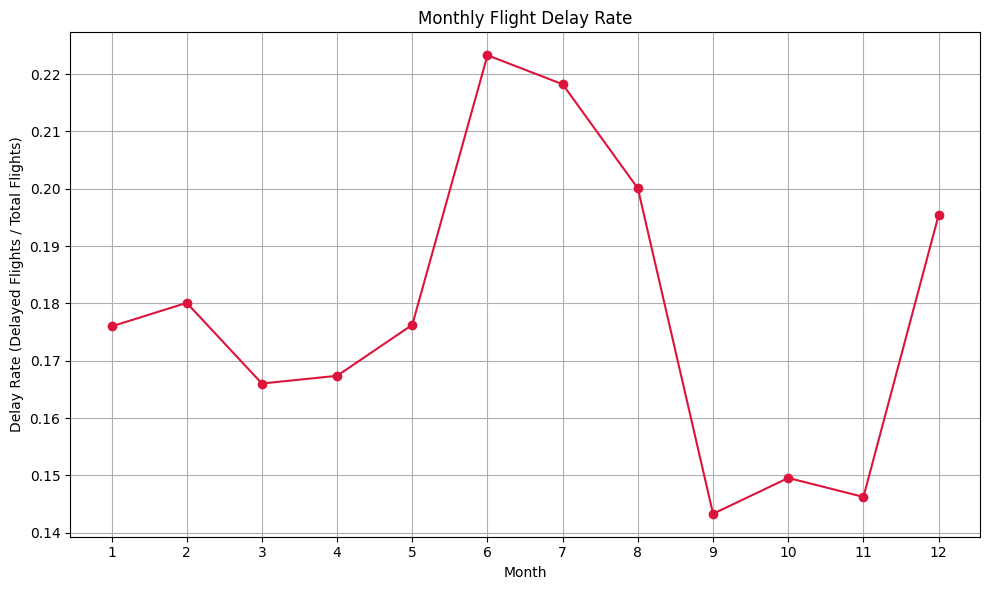

In [35]:
# Calculate delay rate for each month
monthly_delay_rate = (
    data.groupby('month')
    .apply(lambda x: x['arr_del15'].sum() / x['arr_flights'].sum())
    .reset_index(name='delay_rate')
)
plt.figure(figsize=(10, 6))
plt.plot(monthly_delay_rate['month'], monthly_delay_rate['delay_rate'], 
         marker='o', linestyle='-', color='crimson')
plt.title('Monthly Flight Delay Rate')
plt.xlabel('Month')
plt.ylabel('Delay Rate (Delayed Flights / Total Flights)')
plt.xticks(range(1, 13))
plt.grid(True)
plt.tight_layout()
plt.show()

In [36]:
#this shows that delay rate is maximum in month of june to august. 

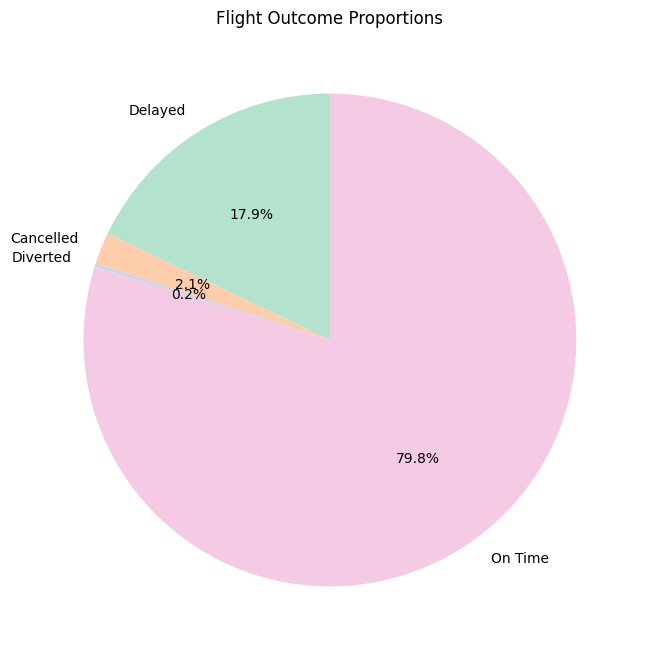

In [37]:
status_counts = {
    'Delayed': data['arr_del15'].sum(),
    'Cancelled': data['arr_cancelled'].sum(),
    'Diverted': data['arr_diverted'].sum(),
}
status_counts['On Time'] = data['arr_flights'].sum() - sum(status_counts.values())

plt.figure(figsize=(8, 8))
plt.pie(status_counts.values(), labels=status_counts.keys(), autopct='%1.1f%%', startangle=90, colors=plt.cm.Pastel2.colors)
plt.title('Flight Outcome Proportions')
plt.show()


In [38]:
#Percent of flights that were on time, delayed, cancelled, or diverted

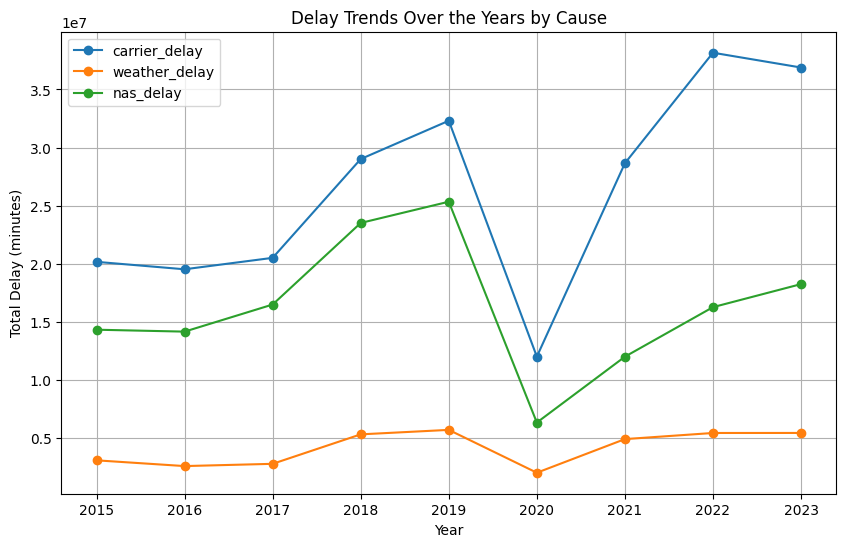

In [39]:
yearly_delays = data.groupby('year')[['carrier_delay', 'weather_delay', 'nas_delay']].sum()

yearly_delays.plot(figsize=(10, 6), marker='o')
plt.title('Delay Trends Over the Years by Cause')
plt.xlabel('Year')
plt.ylabel('Total Delay (minutes)')
plt.grid(True)
plt.show()


In [40]:
#See how delays have evolved over time — overall or by cause.

In [41]:
data2=pd.read_csv('Airline_Delay_Cause_Cleaned.csv')
data2.head()
#dataset after the removal of outliers

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2023,12,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",62.0,7.0,4.25,0.0,...,0.0,1.75,0.0,0.0,348.0,252.0,0.0,33.0,0.0,63.0
1,2023,12,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",95.0,10.0,5.94,0.0,...,0.0,3.00,0.0,0.0,859.0,536.0,0.0,47.0,0.0,276.0
2,2023,12,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",23.0,2.0,0.56,0.0,...,0.0,1.44,1.0,0.0,75.0,9.0,0.0,0.0,0.0,66.0
3,2023,12,9E,Endeavor Air Inc.,ATW,"Appleton, WI: Appleton International",56.0,7.0,3.00,1.0,...,0.0,1.79,0.0,2.0,325.0,168.0,28.0,46.0,0.0,83.0
4,2023,12,9E,Endeavor Air Inc.,AUS,"Austin, TX: Austin - Bergstrom International",48.0,13.0,5.09,0.0,...,0.0,0.85,0.0,0.0,910.0,547.0,0.0,286.0,0.0,77.0


In [42]:
data2

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2023,12,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",62.0,7.0,4.25,0.00,...,0.0,1.75,0.0,0.0,348.0,252.0,0.0,33.0,0.0,63.0
1,2023,12,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",95.0,10.0,5.94,0.00,...,0.0,3.00,0.0,0.0,859.0,536.0,0.0,47.0,0.0,276.0
2,2023,12,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",23.0,2.0,0.56,0.00,...,0.0,1.44,1.0,0.0,75.0,9.0,0.0,0.0,0.0,66.0
3,2023,12,9E,Endeavor Air Inc.,ATW,"Appleton, WI: Appleton International",56.0,7.0,3.00,1.00,...,0.0,1.79,0.0,2.0,325.0,168.0,28.0,46.0,0.0,83.0
4,2023,12,9E,Endeavor Air Inc.,AUS,"Austin, TX: Austin - Bergstrom International",48.0,13.0,5.09,0.00,...,0.0,0.85,0.0,0.0,910.0,547.0,0.0,286.0,0.0,77.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98437,2015,1,WN,Southwest Airlines Co.,AMA,"Amarillo, TX: Rick Husband Amarillo International",147.0,24.0,13.64,0.00,...,0.0,9.49,2.0,0.0,1157.0,590.0,0.0,48.0,0.0,519.0
98438,2015,1,WN,Southwest Airlines Co.,PNS,"Pensacola, FL: Pensacola International",66.0,13.0,4.56,0.00,...,0.0,6.63,0.0,2.0,645.0,161.0,0.0,49.0,0.0,435.0
98439,2015,1,WN,Southwest Airlines Co.,PWM,"Portland, ME: Portland International Jetport",67.0,15.0,5.19,0.37,...,0.0,8.26,3.0,0.0,786.0,304.0,61.0,44.0,0.0,377.0
98440,2015,1,WN,Southwest Airlines Co.,RIC,"Richmond, VA: Richmond International",119.0,27.0,12.42,0.00,...,0.0,13.04,0.0,0.0,1134.0,474.0,0.0,30.0,0.0,630.0


In [43]:
data2.isnull().sum()

year                   0
month                  0
carrier                0
carrier_name           0
airport                0
airport_name           0
arr_flights            0
arr_del15              0
carrier_ct             0
weather_ct             0
nas_ct                 0
security_ct            0
late_aircraft_ct       0
arr_cancelled          0
arr_diverted           0
arr_delay              0
carrier_delay          0
weather_delay          0
nas_delay              0
security_delay         0
late_aircraft_delay    0
dtype: int64

In [44]:
#Making new target column called 'delay_time_per_flight' for regression problem to know how much the flight get delayed
data2['arr_del15'].replace(0, np.nan, inplace=True) ## avoid division by zero
data2['delay_time_per_flight'] = data2['arr_delay'] / data2['arr_del15']
data2.dropna(subset=['delay_time_per_flight'], inplace=True)

C:\Users\Mahi Garg\AppData\Local\Temp\ipykernel_24948\3824607910.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data2['arr_del15'].replace(0, np.nan, inplace=True) ## avoid division by zero


In [45]:
#Making another target column 'delay_ratio_per_flight' for classification problem to know whether flight would get delayed or not
data2['arr_flights'].replace(0, np.nan, inplace=True)  # Avoid divide by zero
data2['delay_ratio_per_flight'] = data2['arr_del15'] / data2['arr_flights']
data2.dropna(subset=['delay_ratio_per_flight'], inplace=True)

C:\Users\Mahi Garg\AppData\Local\Temp\ipykernel_24948\162076735.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data2['arr_flights'].replace(0, np.nan, inplace=True)  # Avoid divide by zero


In [46]:
data2

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,delay_time_per_flight,delay_ratio_per_flight
0,2023,12,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",62.0,7.0,4.25,0.00,...,0.0,0.0,348.0,252.0,0.0,33.0,0.0,63.0,49.714286,0.112903
1,2023,12,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",95.0,10.0,5.94,0.00,...,0.0,0.0,859.0,536.0,0.0,47.0,0.0,276.0,85.900000,0.105263
2,2023,12,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",23.0,2.0,0.56,0.00,...,1.0,0.0,75.0,9.0,0.0,0.0,0.0,66.0,37.500000,0.086957
3,2023,12,9E,Endeavor Air Inc.,ATW,"Appleton, WI: Appleton International",56.0,7.0,3.00,1.00,...,0.0,2.0,325.0,168.0,28.0,46.0,0.0,83.0,46.428571,0.125000
4,2023,12,9E,Endeavor Air Inc.,AUS,"Austin, TX: Austin - Bergstrom International",48.0,13.0,5.09,0.00,...,0.0,0.0,910.0,547.0,0.0,286.0,0.0,77.0,70.000000,0.270833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98437,2015,1,WN,Southwest Airlines Co.,AMA,"Amarillo, TX: Rick Husband Amarillo International",147.0,24.0,13.64,0.00,...,2.0,0.0,1157.0,590.0,0.0,48.0,0.0,519.0,48.208333,0.163265
98438,2015,1,WN,Southwest Airlines Co.,PNS,"Pensacola, FL: Pensacola International",66.0,13.0,4.56,0.00,...,0.0,2.0,645.0,161.0,0.0,49.0,0.0,435.0,49.615385,0.196970
98439,2015,1,WN,Southwest Airlines Co.,PWM,"Portland, ME: Portland International Jetport",67.0,15.0,5.19,0.37,...,3.0,0.0,786.0,304.0,61.0,44.0,0.0,377.0,52.400000,0.223881
98440,2015,1,WN,Southwest Airlines Co.,RIC,"Richmond, VA: Richmond International",119.0,27.0,12.42,0.00,...,0.0,0.0,1134.0,474.0,0.0,30.0,0.0,630.0,42.000000,0.226891


In [47]:
# One-hot encode carrier and airport only
data2_encoded = pd.get_dummies(data2, columns=['carrier', 'airport'], drop_first=True, dtype=int)

# Make sure to drop any remaining object (string) columns like 'carrier_name', 'airport_name', etc.
data2_encoded = data2_encoded.select_dtypes(include=[np.number])

# Define feature columns explicitly
feature_columns = ['arr_flights', 'year', 'month'] + \
    [col for col in data2_encoded.columns if col.startswith('carrier_') or col.startswith('airport_')]

Confusion Matrix:
 [[6871 2205]
 [2088 6851]]

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.76      0.76      9076
           1       0.76      0.77      0.76      8939

    accuracy                           0.76     18015
   macro avg       0.76      0.76      0.76     18015
weighted avg       0.76      0.76      0.76     18015


Accuracy Score: 0.7617


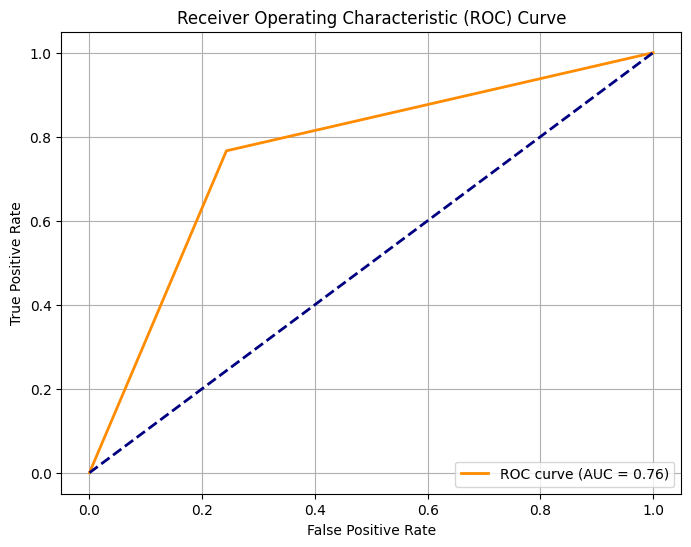

In [48]:
#Classsification
# 2. Binary target: high delay ratio if > 15%
threshold = 0.15
data2_encoded['high_delay_ratio'] = (data2['delay_ratio_per_flight'] > threshold).astype(int)

X = data2_encoded[feature_columns]
y = data2_encoded['high_delay_ratio']

# 5. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 7. Train Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# 8. Predict and evaluate
y_pred = model.predict(X_test_scaled)

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print(f"\nAccuracy Score: {accuracy_score(y_test, y_pred):.4f}")

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

RMSE: 21.06
MAE: 12.59
R² Score (Accuracy): 0.63


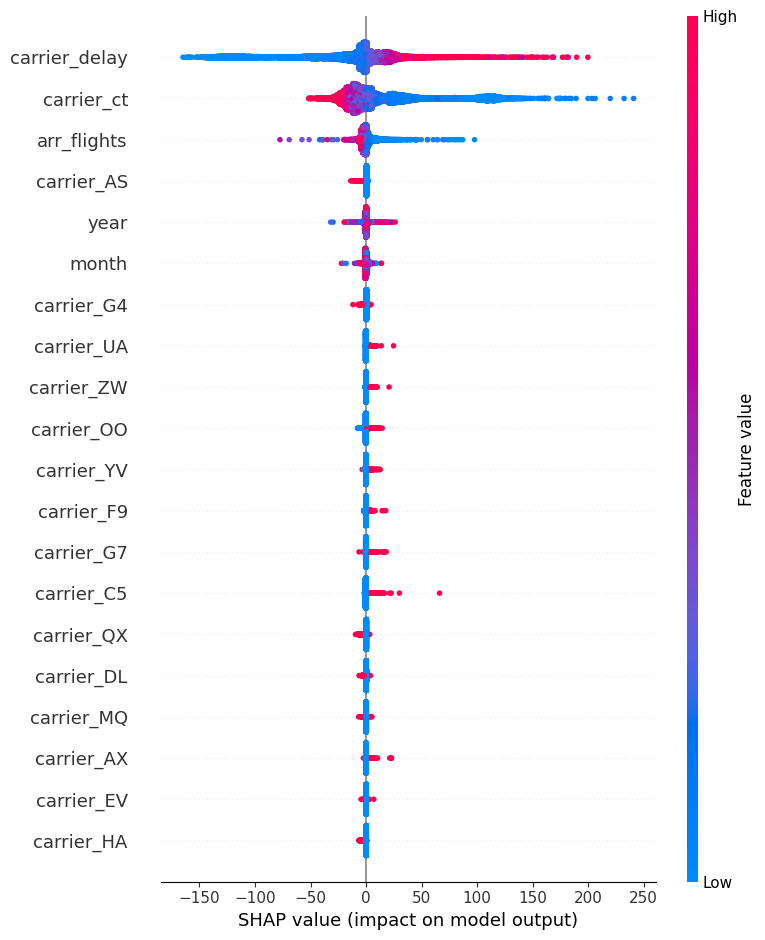


🔧 Top Features Contributing to Delay:
          feature  mean_abs_shap
4   carrier_delay      29.120316
3      carrier_ct      25.939087
0     arr_flights       3.201762
7      carrier_AS       0.768883
1            year       0.759915
2           month       0.642542
16     carrier_G4       0.369009
26     carrier_UA       0.361255
32     carrier_ZW       0.314076
23     carrier_OO       0.311159


In [49]:
oai_weights = {
    'carrier_delay': 3,
    'late_aircraft_delay': 3,
    'nas_delay': 1,
    'weather_delay': 1,
    'security_delay': 1
}
for col, weight in oai_weights.items():
    if col in data2_encoded.columns:
        data2_encoded[f'{col}_weighted'] = data2_encoded[col] * weight

feature_columns = ['arr_flights', 'year', 'month'] + \
    [col for col in data2_encoded.columns if col.startswith('carrier_') or col.startswith('airport_')]
X = data2_encoded[feature_columns]
y = data2_encoded['delay_time_per_flight'] 

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost regressor
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
import numpy as np
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R² Score (Accuracy): {r2:.2f}")


# Step 7: SHAP Explanation
explainer = shap.Explainer(model)
shap_values = explainer(X_test)

shap.summary_plot(shap_values, features=X_test, feature_names=X.columns)
shap_df = pd.DataFrame({
    'feature': X.columns,
    'mean_abs_shap': np.abs(shap_values.values).mean(axis=0)
}).sort_values(by='mean_abs_shap', ascending=False)

print("\n🔧 Top Features Contributing to Delay:")
print(shap_df.head(10))

# # SHAP summary plot
# shap.summa



In [50]:
# Define weights (customize based on business relevance)
weights = {
    'carrier_delay': 0.25,
    'weather_delay': 0.20,
    'nas_delay': 0.20,
    'security_delay': 0.05,
    'late_aircraft_delay': 0.30
}

# Ensure missing values are filled
for col in weights.keys():
    data2_encoded[col] = data2_encoded[col].fillna(0)

# Compute Weighted OAI Score
data2_encoded['Weighted_OAI'] = (
    data2_encoded['carrier_delay'] * weights['carrier_delay'] +
    data2_encoded['weather_delay'] * weights['weather_delay'] +
    data2_encoded['nas_delay'] * weights['nas_delay'] +
    data2_encoded['security_delay'] * weights['security_delay'] +
    data2_encoded['late_aircraft_delay'] * weights['late_aircraft_delay']
)

# Display top rows with new OAI
print(data2_encoded['Weighted_OAI'].head())
# Min-Max Normalization of OAI
min_oai = data2_encoded['Weighted_OAI'].min()
max_oai = data2_encoded['Weighted_OAI'].max()

data2_encoded['Normalized_OAI'] = ((data2_encoded['Weighted_OAI'] - min_oai) / (max_oai - min_oai)) * 100

# View sample
print(data2_encoded[['Weighted_OAI', 'Normalized_OAI']].head())

# Calculate average of the normealized OAI
average_normalized_oai = data2_encoded['Normalized_OAI'].mean()

# Print the result
print(f"Average Normalized OAI: {average_normalized_oai:.2f}")


0     88.50
1    226.20
2     22.05
3     81.70
4    217.05
Name: Weighted_OAI, dtype: float64
   Weighted_OAI  Normalized_OAI
0         88.50       12.417399
1        226.20       32.415947
2         22.05        2.766684
3         81.70       11.429816
4        217.05       31.087067
Average Normalized OAI: 19.18


C:\Users\Mahi Garg\AppData\Roaming\Python\Python313\site-packages\numpy\lib\_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\Mahi Garg\AppData\Roaming\Python\Python313\site-packages\numpy\lib\_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
C:\Users\Mahi Garg\AppData\Local\Temp\ipykernel_24948\3580072133.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=normalized_contrib_df, x='Delay Cause', y='Correlation with Normalized OAI',


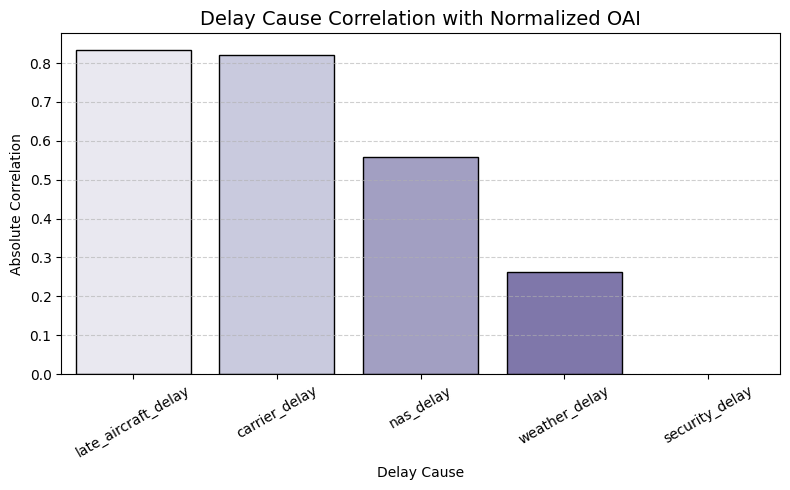

In [51]:
# Compute absolute correlation between delay causes and Normalized OAI
normalized_contributions = data2_encoded[
    ['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']
].corrwith(data2_encoded['Normalized_OAI']).abs().sort_values(ascending=False)

# Convert to DataFrame for plotting
normalized_contrib_df = normalized_contributions.reset_index()
normalized_contrib_df.columns = ['Delay Cause', 'Correlation with Normalized OAI']

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=normalized_contrib_df, x='Delay Cause', y='Correlation with Normalized OAI',
            palette='Purples', edgecolor='black')
plt.title('Delay Cause Correlation with Normalized OAI', fontsize=14)
plt.ylabel('Absolute Correlation')
plt.xlabel('Delay Cause')
plt.xticks(rotation=30)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()